In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./course-data/Advertising.csv')

In [3]:
df.info()
# Question: is there a relationship between how much we're spending on advertisement versus the result we get in sales

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


In [5]:
df['total_spend'] = df['TV'] + df['radio'] + df['newspas']

# note that df['total'] is an engineered feature since it didn't exist in the original data (an aggregation of information)

In [6]:
df.head()
# here X is the total expenditures df.total_spend and y is the sales df.sales

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [16]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0
total_spend,200.0,200.8605,92.985181,11.7,123.550,207.35,281.125,433.6


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

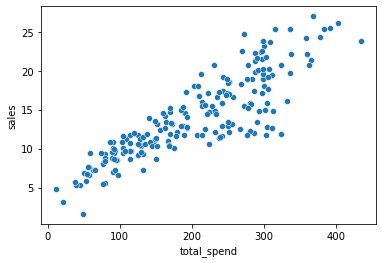

In [8]:
sns.scatterplot(data=df, x='total_spend',y='sales')

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

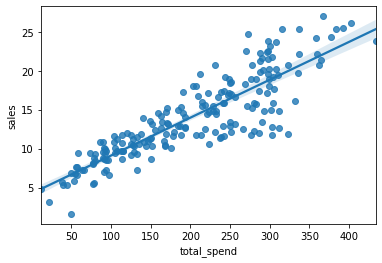

In [10]:
sns.regplot(data=df, x='total_spend',y='sales')

In [10]:
X = df['total_spend']
y = df['sales']

In [12]:
# help(np.polyfit)
# y = mx + b
# y = B1x + B0

In [18]:
beta = np.polyfit(X,y,deg=1)
beta
# this method return the coefficients B1 and B0

array([0.04868788, 4.24302822])

In [14]:
pontetial_spend = np.linspace(0,500,101)

In [20]:
predicted_sales = beta[0]*pontetial_spend + beta[1]

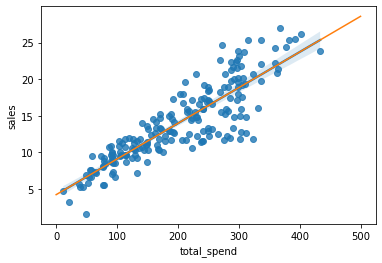

In [23]:
sns.regplot(data=df, x='total_spend',y='sales')
plt.plot(pontetial_spend, predicted_sales)

In [28]:
predicted200 = beta[0]*200 + beta[1]
predicted200

13.98060407984596

In [54]:
beta3 = np.polyfit(X,y,3)
beta3
# y = B3 x**3 + B2 x**2 + B1x + B0 -> we fit to a higher order
# note that third and second order coefficients are quite small -> there is less information in x**3 and x**2 -> there is no real higher order relationship

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [44]:
len(pontetial_spend)

101

In [81]:
predicted_sales3 = np.zeros(len(pontetial_spend))

for i in range(len(beta3)):
    predicted_sales3 += beta3[i]*ps**(3-i)

In [49]:
# alternative
# predict_sales3 = np.zeros(len(pontetial_spend)) <- this line is not neccesary

# for i,b in enumerate(beta3): 
#     predicted_sales3 += b*pontetial_spend**(3-i)

# predicted_sales3 = beta3[0]*ps**(3-0) + beta3[1]*ps**(3-1) + beta3[2]*ps**(3-2) + beta3[3]*ps**(3-3)

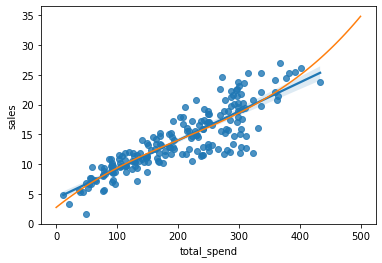

In [82]:
sns.regplot(data=df, x='total_spend',y='sales')
plt.plot(pontetial_spend, predicted_sales3) 